In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
import sklearn
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics, datasets, svm
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sn
import requests
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

In [306]:
df_nat=pd.read_csv('MSA_nat.faa')
df_art=pd.read_csv('MSA_art.faa')

In [307]:
#df_nat.head()

In [308]:
#df[(df["secuencia"].str.startswith('>'))]:
def splitme(s, n):
    aslist = [s[i:i+n] for i in range(0, len(s), n)]
    return aslist    

In [309]:
joined_nat=[]
joined_art=[]

true_false_nat=[]
true_false_art=[]


for i in df_nat.index:
    if (df_nat["secuencia"][i].endswith('_true')):
        seq_t=splitme((df_nat["secuencia"][i+1]+
                                   df_nat["secuencia"][i+2]),1)
        seq_t.append(1)
        joined_nat.append(seq_t)

    elif (df_nat["secuencia"][i].endswith('_false')):
        seq_f=splitme((df_nat["secuencia"][i+1]+
                                   df_nat["secuencia"][i+2]),1)
        seq_f.append(0)
        joined_nat.append(seq_f)    

for i in df_art.index:
    if (df_art["secuencia"][i].endswith('_true')):
        seq_t=splitme((df_art["secuencia"][i+1]+
                                   df_art["secuencia"][i+2]),1)
        seq_t.append(1)
        joined_art.append(seq_t)

    elif (df_art["secuencia"][i].endswith('_false')):
        seq_f=splitme((df_art["secuencia"][i+1]+
                                   df_art["secuencia"][i+2]),1)
        seq_f.append(0)
        joined_art.append(seq_f) 
df1_nat=pd.Series(joined_nat)
df1_art=pd.Series(joined_art)
print("Number of natural sequences:")
df1_nat.index

Number of natural sequences:


RangeIndex(start=0, stop=1130, step=1)

In [310]:
#df1_nat.head()

In [311]:
print("Number of artificial sequences:")
df1_art.index

Number of artificial sequences:


RangeIndex(start=0, stop=1003, step=1)

In [312]:
nat=pd.DataFrame.from_dict(dict(zip(df1_nat.index,df1_nat.values))).transpose()
art=pd.DataFrame.from_dict(dict(zip(df1_art.index,df1_art.values))).transpose()
nat

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-,T,S,E,N,P,L,L,A,L,...,T,Q,Q,A,L,L,Q,Q,H,1
1,-,-,-,D,E,R,I,Q,A,L,...,L,E,E,R,Q,D,Q,-,-,0
2,P,E,D,C,T,G,L,A,D,I,...,E,Q,I,K,Y,W,R,Q,T,0
3,-,T,P,E,N,P,L,L,D,L,...,T,Q,Q,A,L,L,Q,Q,H,1
4,-,-,-,D,E,R,I,Q,A,L,...,L,E,E,K,E,D,Q,K,K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,E,S,E,S,L,T,L,E,G,I,...,D,E,H,P,F,F,P,D,D,0
1126,Q,S,E,I,L,T,L,D,N,I,...,D,E,H,P,F,F,P,E,D,0
1127,R,S,Q,I,L,T,L,D,S,I,...,D,E,H,P,F,F,P,E,D,0
1128,R,S,E,T,L,T,L,D,S,I,...,D,E,Y,P,F,F,P,E,D,0


In [313]:
#art

In [314]:
lista_char = "A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y"
lista_char = lista_char.split(",")
lista_char = {x:int(i) for i,x in enumerate(lista_char)}

def conv_char(x):
    ans1 = np.zeros(len(lista_char),dtype=int)
    if x =="-":
        return ans1
    else:
        ans1[lista_char[x]]=1
        return ans1
    
        
    

In [315]:
nat1 = nat.loc[:, nat.columns != 96].applymap(lambda x: conv_char(x))
art1 = art.loc[:, art.columns != 96].applymap(lambda x: conv_char(x))
target_nat = nat[96]
target_art = art[96]
nat1["target"] = target_nat
art1["target"] = target_art



In [316]:
nat1

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,target
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 

In [317]:
def to1920(nat1):
    arr=[]
    for j in range (96):
        arr=arr+nat1[j][0].tolist()
    #    print(type(arr))
        prov=pd.DataFrame(arr).transpose()
    tratar=prov
    for i in nat1.index:
        arr=[]
        if i==0:
            continue
        else:
            for j in range (96):
                arr=arr+nat1[j][i].tolist()
        dfprov=pd.DataFrame(arr).transpose()
        tratar=pd.concat([tratar,dfprov],ignore_index = True)
    return tratar   
            
nat_final=to1920(nat1) 
art_final=to1920(art1)

In [318]:
nat_final

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
art_final

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## PCA

In [320]:
X=nat_final
y=nat1['target']

In [321]:
from sklearn.decomposition import KernelPCA, PCA

transformers = [PCA(n_components=i).fit(X) for i in range(200)]

var_ratio=np.array([[sum(transformer.explained_variance_ratio_),i] for transformer,i in zip(transformers,range(200))]).T

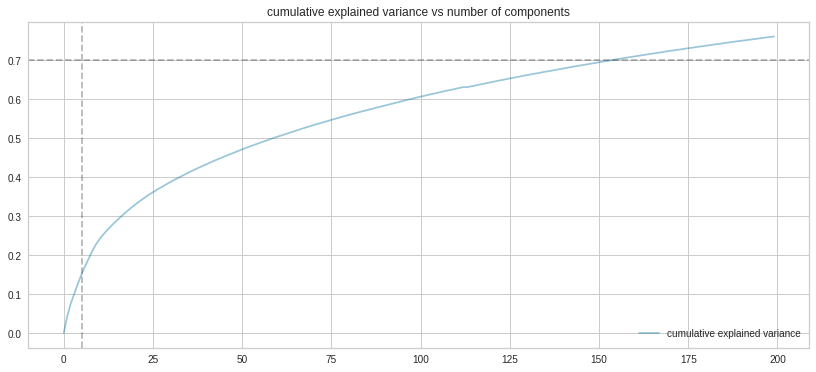

In [322]:
f,ax=plt.subplots(1,1,figsize=(14,6))
plt.plot(var_ratio[1],var_ratio[0],color='b',label='cumulative explained variance',alpha=0.4)
ax.axhline(0.7,ls='dashed',color='k',alpha=0.3)
ax.axvline(5,ls='dashed',color='k',alpha=0.3)
plt.legend()
plt.title('cumulative explained variance vs number of components')
plt.show()

In [351]:
# Separating out the features
x1 = nat_final.values
x2 = art_final.values
# Separating out the target
y1 = nat1['target'].values
y2 = art1['target'].values


# Standardizing the features
from sklearn.decomposition import PCA

n_components=5

pca = PCA(n_components)
principalComponents = pca.fit_transform(x1)
principalDf = pd.DataFrame(data = principalComponents)
gene_seq_projected=pca.transform(x2)
principalDf_gene=pd.DataFrame(data = gene_seq_projected)

In [352]:
principalDf["target"]=nat1["target"]
principalDf

,0,1,2,3,4,target
0,-0.079350,0.702735,-2.001330,-0.066246,-1.750311,1
1,-0.855577,-2.175506,0.232762,1.329725,-1.424010,0
2,0.376045,0.436901,0.767556,0.010819,1.204643,0
3,-0.043257,0.791969,-1.993876,-0.040115,-1.657221,1
4,-0.798064,-2.133814,0.021808,1.497676,-1.084416,0
...,...,...,...,...,...,...
1125,-0.448107,0.848285,3.226535,-1.446613,1.480187,0
1126,-0.655333,0.802749,3.324150,-1.531314,1.743043,0
1127,-0.565822,0.713907,3.592173,-1.483733,1.644965,0
1128,-0.715706,0.869271,3.455298,-1.437272,1.507090,0


In [353]:
principalDf_gene["target"]=art1["target"]
principalDf_gene

,0,1,2,3,4,target
0,-0.610481,1.246782,-0.027126,-0.457925,-0.629867,1
1,0.308289,-1.837629,-0.221030,3.642399,3.591117,0
2,-0.688431,1.041937,-2.201680,0.288202,-1.280611,1
3,-0.749154,-2.328505,0.951574,2.515674,-1.573888,1
4,-0.338627,-1.507107,-2.996024,-2.548790,1.918197,1
...,...,...,...,...,...,...
998,-0.508601,-2.016571,0.072327,2.022817,-1.334696,1
999,-0.992914,1.121505,-0.291343,0.144673,-0.805511,1
1000,-0.485393,-1.550631,-2.561974,-2.598823,2.045844,1
1001,-1.153306,0.530863,-1.104973,-1.309455,0.751659,1


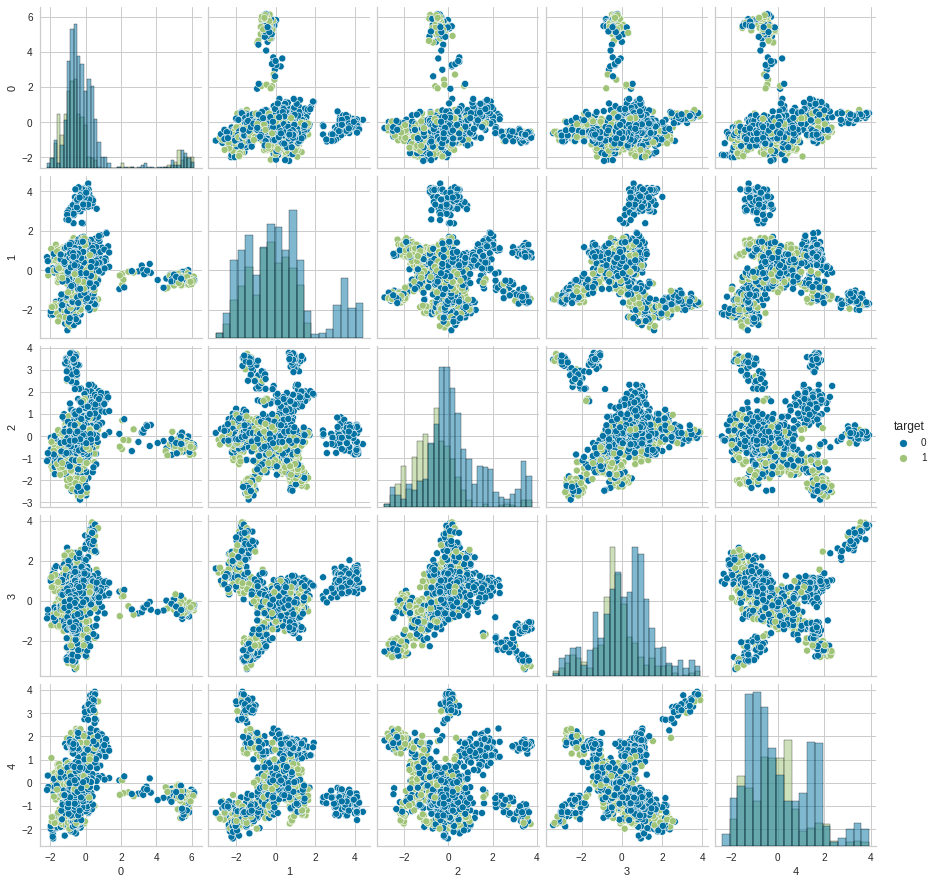

In [354]:
sns.pairplot(principalDf,diag_kind='hist',hue='target')
plt.show()

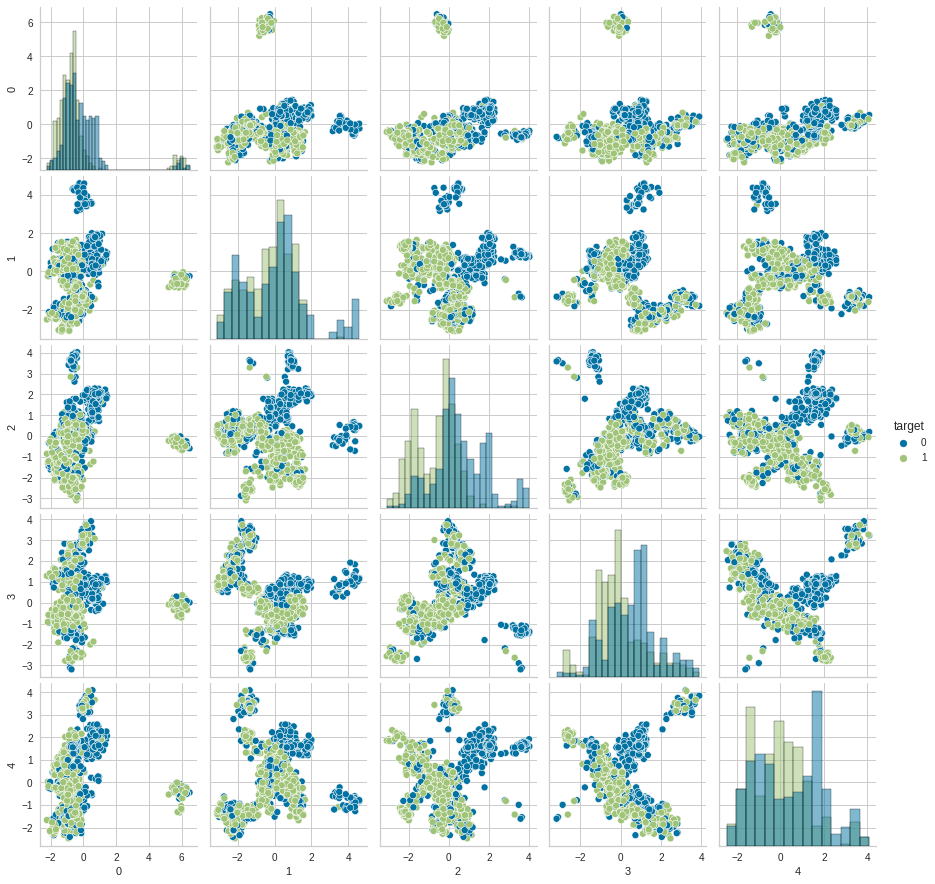

In [355]:
sns.pairplot(principalDf_gene,diag_kind='hist',hue='target')
plt.show()

# Kmeans

### Distortion

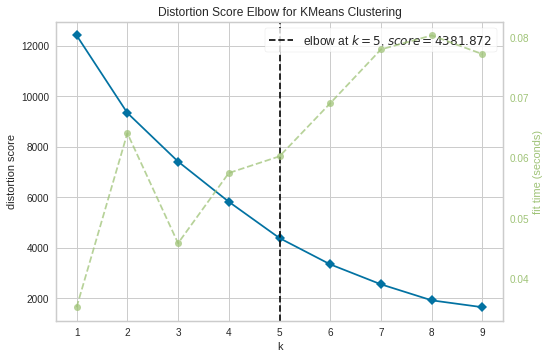

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [356]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(principalDf)        # Fit the data to the visualizer
visualizer.show()

### Calinski Harabasz

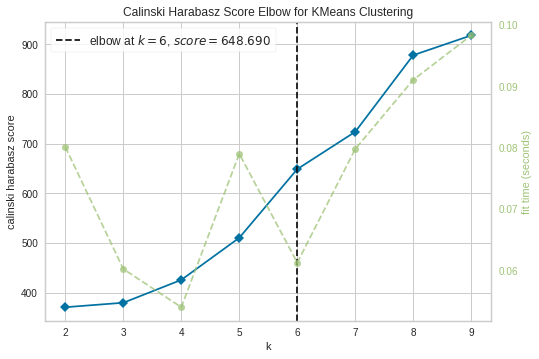

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [357]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(principalDf)     
visualizer.show()


### Silhouette

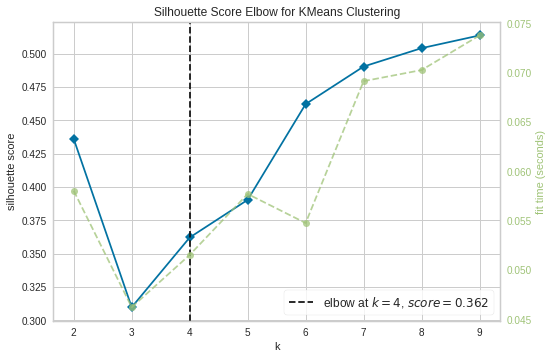

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [358]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(principalDf)        # Fit the data to the visualizer
visualizer.show()

In [370]:
model = KMeans(5)
model.fit(principalDf)
label=model.labels_
dflabel=pd.DataFrame(label)
principalDf["cluster"]=dflabel
principalDf

,0,1,2,3,4,target,cluster
0,-0.079350,0.702735,-2.001330,-0.066246,-1.750311,1,2
1,-0.855577,-2.175506,0.232762,1.329725,-1.424010,0,1
2,0.376045,0.436901,0.767556,0.010819,1.204643,0,0
3,-0.043257,0.791969,-1.993876,-0.040115,-1.657221,1,2
4,-0.798064,-2.133814,0.021808,1.497676,-1.084416,0,1
...,...,...,...,...,...,...,...
1125,-0.448107,0.848285,3.226535,-1.446613,1.480187,0,0
1126,-0.655333,0.802749,3.324150,-1.531314,1.743043,0,0
1127,-0.565822,0.713907,3.592173,-1.483733,1.644965,0,0
1128,-0.715706,0.869271,3.455298,-1.437272,1.507090,0,0


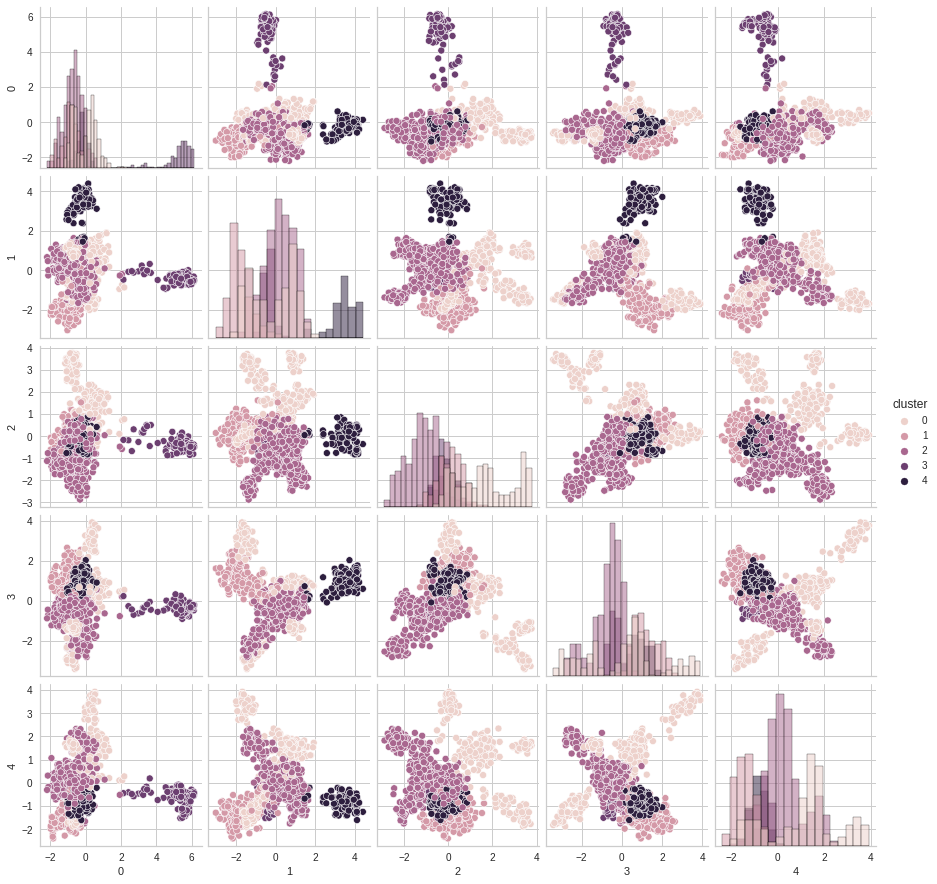

In [371]:
sns.pairplot(principalDf.drop(["target"],axis=1),diag_kind='hist',hue='cluster')
plt.show()

#### Functional

In [372]:
functional=principalDf.loc[(principalDf['target']>0)].drop(["target"], axis=1)


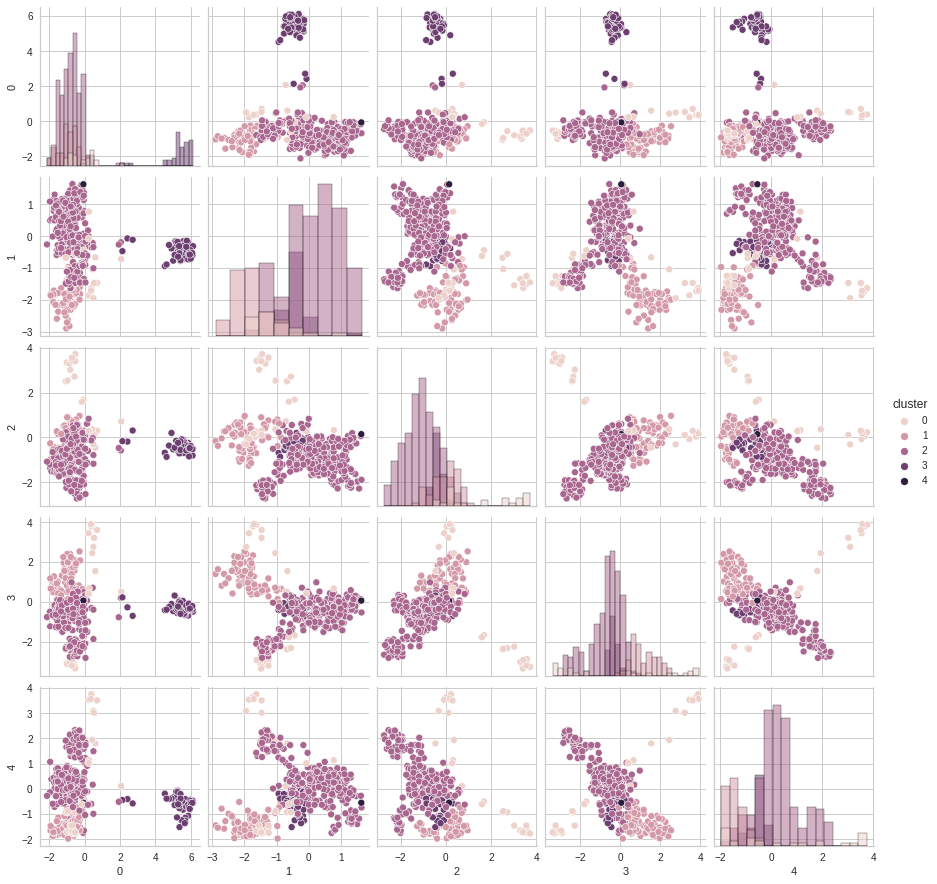

In [373]:
sns.pairplot(functional,diag_kind='hist',hue='cluster')
plt.show()

#### Nonfunctional

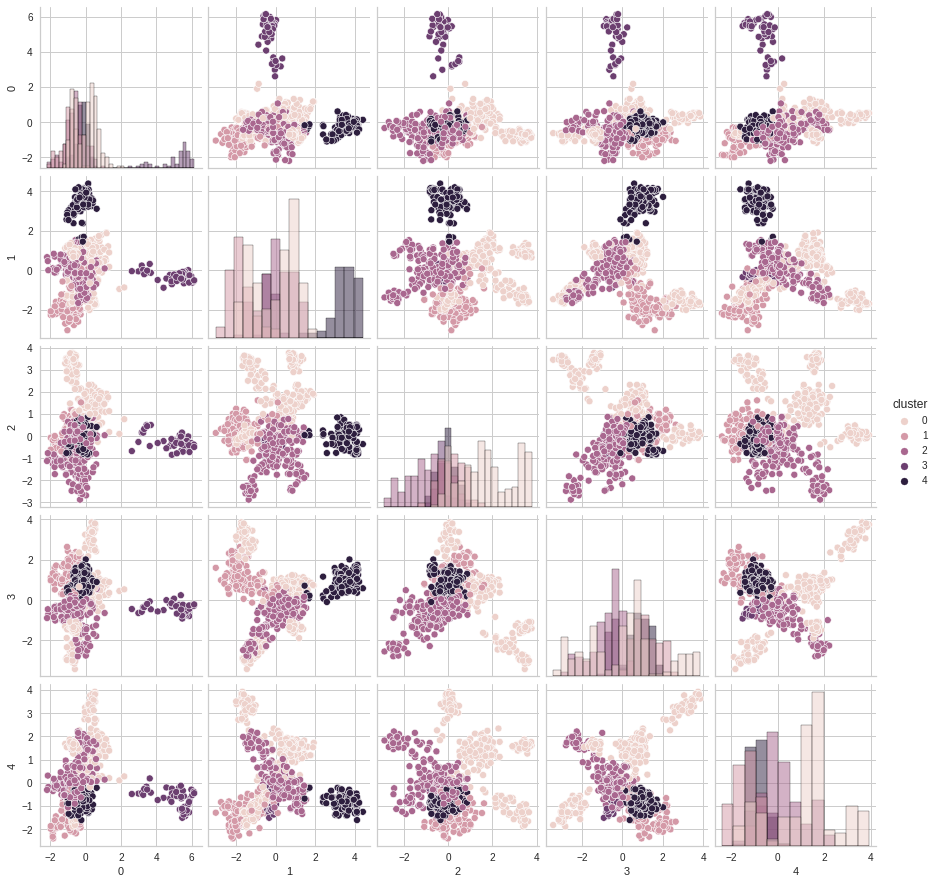

In [374]:
nonfunctional=principalDf.loc[(principalDf['target']==0)].drop(["target"], axis=1)
sns.pairplot(nonfunctional,diag_kind='hist',hue='cluster')
plt.show()

### Unifying

In [375]:
united=pd.concat([principalDf.drop(["cluster"],axis=1),principalDf_gene],ignore_index = True)
#united

In [376]:
model = KMeans(6)
model.fit(united)
label=model.labels_
dflabel=pd.DataFrame(label)
united["cluster"]=dflabel
#united

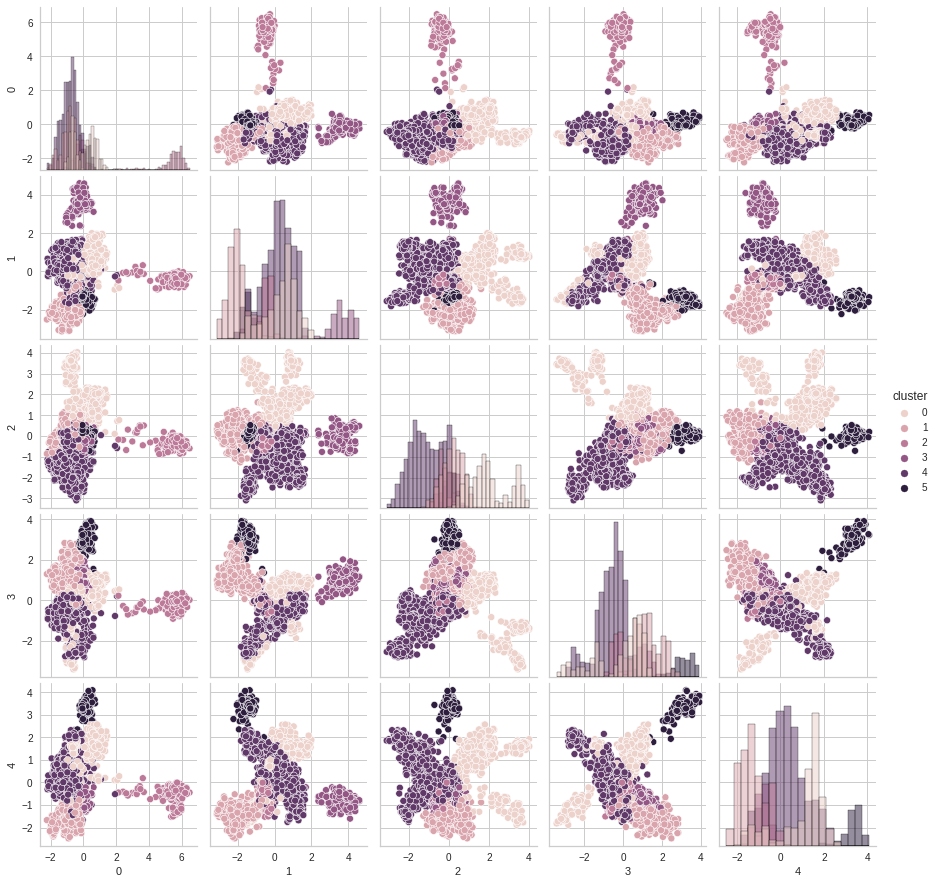

In [377]:
sns.pairplot(united.drop(["target"],axis=1),diag_kind='hist',hue='cluster')
plt.show()

# Prediction

In [378]:
principalDf

,0,1,2,3,4,target,cluster
0,-0.079350,0.702735,-2.001330,-0.066246,-1.750311,1,2
1,-0.855577,-2.175506,0.232762,1.329725,-1.424010,0,1
2,0.376045,0.436901,0.767556,0.010819,1.204643,0,0
3,-0.043257,0.791969,-1.993876,-0.040115,-1.657221,1,2
4,-0.798064,-2.133814,0.021808,1.497676,-1.084416,0,1
...,...,...,...,...,...,...,...
1125,-0.448107,0.848285,3.226535,-1.446613,1.480187,0,0
1126,-0.655333,0.802749,3.324150,-1.531314,1.743043,0,0
1127,-0.565822,0.713907,3.592173,-1.483733,1.644965,0,0
1128,-0.715706,0.869271,3.455298,-1.437272,1.507090,0,0


In [379]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



In [380]:
X=principalComponents
y=nat1["target"]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)


In [381]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [382]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.672566371681416


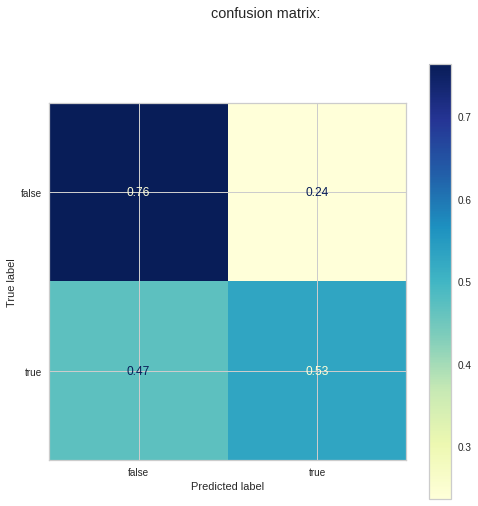

array([[158,  49],
       [ 62,  70]])

In [383]:
f,ax=plt.subplots(1,1,figsize=(8,8))
plot_confusion_matrix(clf, X_test, y_test,cmap='YlGnBu',ax=ax,normalize='true',display_labels=['false','true'])
plt.suptitle('confusion matrix:')
plt.show()
confusion_matrix(y_test, y_pred)

## Artificial

In [384]:
principalDf_gene


,0,1,2,3,4,target
0,-0.610481,1.246782,-0.027126,-0.457925,-0.629867,1
1,0.308289,-1.837629,-0.221030,3.642399,3.591117,0
2,-0.688431,1.041937,-2.201680,0.288202,-1.280611,1
3,-0.749154,-2.328505,0.951574,2.515674,-1.573888,1
4,-0.338627,-1.507107,-2.996024,-2.548790,1.918197,1
...,...,...,...,...,...,...
998,-0.508601,-2.016571,0.072327,2.022817,-1.334696,1
999,-0.992914,1.121505,-0.291343,0.144673,-0.805511,1
1000,-0.485393,-1.550631,-2.561974,-2.598823,2.045844,1
1001,-1.153306,0.530863,-1.104973,-1.309455,0.751659,1


In [385]:
X_art=gene_seq_projected
y_art=art1["target"]
y_art=y_art.astype('int')
X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(X_art, y_art, test_size=0.3, random_state=29)


In [386]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_art,y_train_art)

#Predict the response for test dataset
y_pred_art = clf.predict(X_test_art)

print("Accuracy:",metrics.accuracy_score(y_test_art, y_pred_art))

Accuracy: 0.6777408637873754


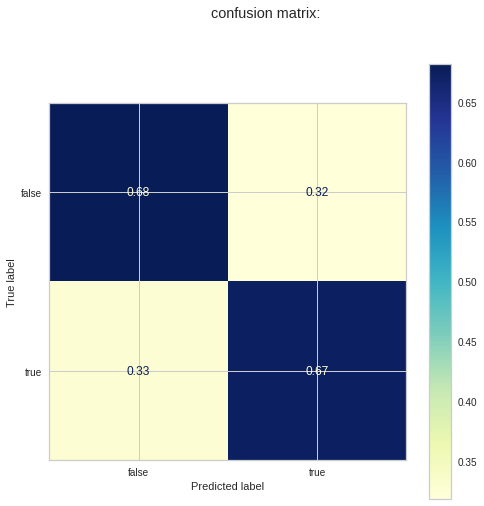

array([[105,  49],
       [ 48,  99]])

In [387]:
f,ax=plt.subplots(1,1,figsize=(8,8))
plot_confusion_matrix(clf, X_test_art, y_test_art,cmap='YlGnBu',ax=ax,normalize='true',display_labels=['false','true'])
plt.suptitle('confusion matrix:')
plt.show()
confusion_matrix(y_test_art, y_pred_art)

In [388]:
print("Predictions for natural sequences:"+"\n"+"#"*40)
print(confusion_matrix(y_test, y_pred))
print("Predictions for artificial sequences:"+"\n"+"#"*40)
print(confusion_matrix(y_test_art, y_pred_art))


Predictions for natural sequences:
########################################
[[158  49]
 [ 62  70]]
Predictions for artificial sequences:
########################################
[[105  49]
 [ 48  99]]


In [389]:
print("Accuracy for natural sequences:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy for artificial sequences:",metrics.accuracy_score(y_test_art, y_pred_art))

Accuracy for natural sequences: 0.672566371681416
Accuracy for artificial sequences: 0.6777408637873754
